In [276]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB



In [277]:
#Naive Bayes

divorce = pd.read_csv('/home/anderson/Área de Trabalho/Repositorios_GIT/Estatistica_descritiva_Trabalho_Grupo_1/data-eng/divorce.csv',sep=';')
divorce.head(3)

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1


In [278]:
#Definindo nova estrutura do dataSet a ser utilizado. Há 6 features princiapais, porque segundo
#estudo foram valores mais significantes.

divorce_teste = divorce[['Atr33','Atr34','Atr35','Atr36','Atr37','Atr39','Atr40','Atr46','Atr48','Class']]

divorce_teste.head(n = 4)

,Atr33,Atr34,Atr35,Atr36,Atr37,Atr39,Atr40,Atr46,Atr48,Class
0,1,2,0,1,2,3,3,2,3,1
1,2,3,0,2,3,2,4,2,3,1
2,1,1,1,1,2,3,3,3,3,1
3,2,2,1,1,3,4,4,2,3,1


In [279]:

def separate_by_class(dataset):
  classes = np.unique(dataset['Class'])

  separated = []
  for cl in classes:
    separated.append(dataset[dataset['Class'] == cl])

  return separated

separated = separate_by_class(divorce_teste)

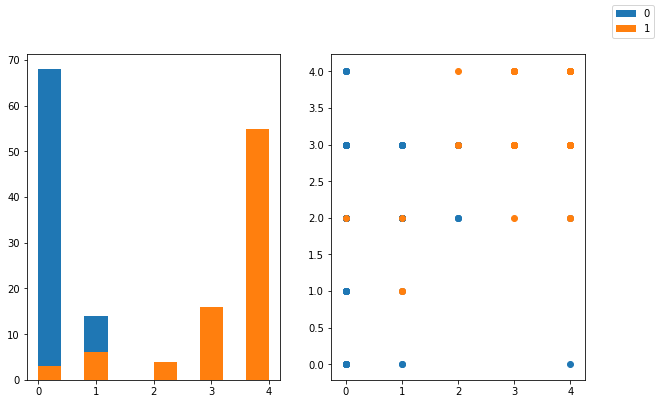

In [280]:
#Exibindo histograma de acordo com casados e divorciados. 0=Casado, 1=Divorciado

fig,ax = plt.subplots(1,2)
fig.set_size_inches(10,h=6)
for s in separated:
  ax[0].hist(s['Atr33']) 
  ax[1].scatter(s['Atr37'], s['Atr48']) 
fig.legend(['0', '1'])

In [281]:
#Calculando desvio padrão de cada coluna do dataset

def summarize_dataset(dataset, eliminate_last=True):
  if eliminate_last:
    columns = dataset.columns[:-1]
  else:
    columns = dataset.columns
  summaries = [(np.mean(dataset[column]), np.std(dataset[column]), len(dataset[column])) for column in columns]
  del(summaries[-1])
  return summaries

summaries = summarize_dataset(divorce_teste,True)

print(summaries)

[(1.8058823529411765, 1.7799440137379396, 170), (1.9, 1.6257125134754276, 170), (1.6705882352941177, 1.8368017940022319, 170), (1.6058823529411765, 1.793114473638238, 170), (2.088235294117647, 1.7109963911472872, 170), (2.088235294117647, 1.7144309132774624, 170), (1.8705882352941177, 1.790749007237034, 170), (2.552941176470588, 1.3677450945255172, 170)]


In [282]:
def summarize_by_class(dataset):
  separated = separate_by_class(dataset)
  summaries = dict()
  for s in separated:
    class_value = np.array(s['Class'])
    rows = s[s.columns]
    summaries[class_value[0]] = summarize_dataset(rows, eliminate_last=False)
  return summaries

# Para cada classe, calcula a média, o desvio padrão e a quantidade de elementos de cada coluna do dataset
summaries_by_class = summarize_by_class(divorce_teste)
print(summaries_by_class)


{0: [(0.29069767441860467, 0.6797105928221151, 86), (0.5581395348837209, 0.7564398124321206, 86), (0.10465116279069768, 0.4043102011793884, 86), (0.03488372093023256, 0.1834852771867385, 86), (0.627906976744186, 0.9027929741293796, 86), (0.5697674418604651, 0.7706943060374667, 86), (0.20930232558139536, 0.4850384561538191, 86), (1.9534883720930232, 1.3460275468360723, 86), (2.046511627906977, 1.0332492972801415, 86)], 1: [(3.357142857142857, 1.0871857196981793, 84), (3.2738095238095237, 1.0159582677522037, 84), (3.2738095238095237, 1.2568970719327426, 84), (3.2142857142857144, 1.165694444275586, 84), (3.5833333333333335, 0.8195285133093213, 84), (3.642857142857143, 0.7502833931708915, 84), (3.5714285714285716, 0.7284313590846839, 84), (3.1666666666666665, 1.0892694508283687, 84), (3.4523809523809526, 0.7138887785983316, 84)]}


In [283]:
#Probabilidade Gaussiana

In [284]:
def calculate_probability(x, mean, stdev):
    exponent = np.exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (np.sqrt(2 * np.pi) * stdev)) * exponent

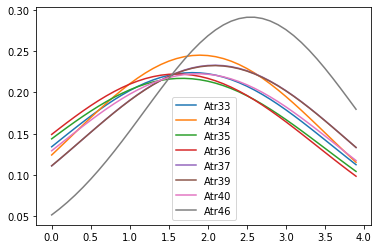

In [285]:
#Distribuição de probabilidade 

x = np.arange(0,4,0.1)
for summ in summaries:
    y = calculate_probability(x, summ[0], summ[1])
    plt.plot(x,y)

plt.legend(['Atr33','Atr34','Atr35','Atr36','Atr37','Atr39','Atr40','Atr46','Atr48','Class'])

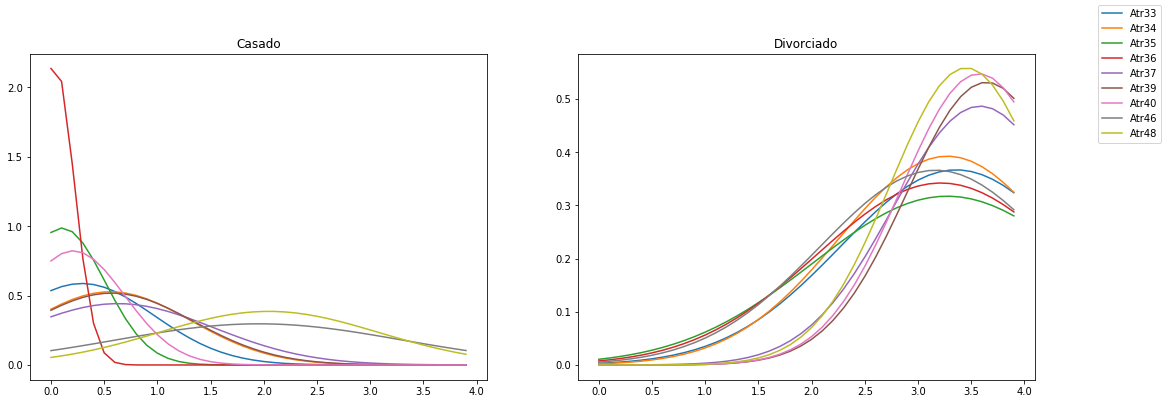

In [286]:
#Probabilidade de acordo com a classe. 1 divorciado, 0 casado.


n_classes = len(summaries_by_class)
fig,ax = plt.subplots(1,n_classes)
fig.set_size_inches(18, h=6)

classes_name = ['Casado', 'Divorciado']
for c in range(n_classes):
  for summ in summaries_by_class[c]:
      ax[c].plot(x, calculate_probability(x, summ[0], summ[1]))
  ax[c].set_title(classes_name[c])

#Escolheremos algumas colunas
fig.legend(['Atr33','Atr34','Atr35','Atr36','Atr37','Atr39','Atr40','Atr46','Atr48'])


In [287]:
# Cálculo do percentual de acurácia
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [288]:
# Predizer a classe de uma dada linha
def predict(summaries, row):

    probabilities = calculate_class_probabilities(summaries, row)
    best_label, best_prob = None, -1
    for class_value, probability in probabilities.items():
        if best_label is None or probability > best_prob:
            best_prob = probability
            best_label = class_value
    return best_label


In [289]:
# Cálculo da probabilidade de predizer cada classe para uma dada linha da dados
def calculate_class_probabilities(summaries, row):
  total_rows = sum([summaries[label][0][2] for label in summaries])
  probabilities = dict()
  for class_value, class_summaries in summaries.items():
    probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
    for i in range(len(class_summaries)):
      mean, stdev, count = class_summaries[i]
      probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
  return probabilities


In [290]:
# Dividir o dataset em treinamento e teste
def split(dataset):
  sz = dataset.shape[0]
  sh = np.arange(sz)
  np.random.shuffle(sh)
  vec = np.zeros((sz),dtype=bool)
  vec[sh[:int(sz*0.75)]] = True
  train = dataset.loc[vec]
  test = dataset.loc[~vec]

  return train, test


In [291]:
train,test = split(divorce_teste)

In [292]:
# Algoritmo Naive Bayes
def naive_bayes(train, test):
  summarize = summarize_by_class(train)
  predictions = list()
  vec = np.zeros(test.shape[0], dtype=bool)
  for i in range(test.shape[0]):
    vec[i] = True
    row = np.array(test.loc[vec])[0]
    output = predict(summarize, row)
    predictions.append(output)
    vec[i] = False
  return(predictions)

In [294]:
# Realização de predições conforme o algoritmo Naive Bayes
predictions = naive_bayes(train,test)

print(predictions)
actual = np.array(test['Class'])
print(actual)

# Acurácia
print('Accuracy ', accuracy_metric(actual, predictions))

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
Accuracy  97.67441860465115


In [304]:
#GaussianNB

dataSet = divorce_teste

y = dataSet['Class'] #alvo
x = dataSet.drop('Class', axis = 1) #restante dos valores.

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [305]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
score = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print('Accuracy Score: {0:.4f}'.format(score))
print('Consusion Matrix')
print( matrix)
c_r = classification_report(y_test, y_pred)
print ('Classification Report:\n %s' % c_r)

Accuracy Score: 0.8824
Consusion Matrix
[[15  1]
 [ 3 15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88        16
           1       0.94      0.83      0.88        18

    accuracy                           0.88        34
   macro avg       0.89      0.89      0.88        34
weighted avg       0.89      0.88      0.88        34

